## Introduction

This notebook is to plot the rotation curve of M33, as measured in https://academic.oup.com/mnras/article/311/2/441/965167.
The data is curve-traced and in the data directory.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=22)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rc('text', usetex=True)

## Import data

### Read data

In [2]:
def read_curve(fn):
    def stringformatter(s):
        s = str(s)
        s = s.replace(';', '')
        s = s.replace(',', '.')
        s = s.replace("b'", '')
        s = s.replace("'", '')
        return s
    d = np.loadtxt(fn, converters={i: stringformatter for i in (0,1)})
    return d[:, 0], d[:, 1]

In [3]:
d = {}
fns = ['fit', 'pts', 'pts+', 'pts-', 'halo', 'gas', 'stellar_disk', 'luminous+', 'luminous-']
for fn in fns:
    d[fn + '_x'], d[fn] = read_curve('data/rotation_curve/%s.txt' % fn)

### Format data

Add the error bars instead of the location of the top and bottom error bar (assume symmetric errors)

In [4]:
d['dpts'] = (d['pts+'] - d['pts-']) * 0.5

Add the point (0, 0) for all theoretical curves

In [5]:
for fn in ['gas', 'stellar_disk', 'halo', 'fit', 'luminous+', 'luminous-']:
    d[fn + '_x'] = np.concatenate([[0], d[fn + '_x']])
    d[fn] = np.concatenate([[0], d[fn]])

Add sums

In [6]:
xp = np.linspace(0, 16, 200)
d['x'] = xp
d['baryons'] = np.sqrt(np.interp(xp, d['gas_x'], d['gas'])**2 + np.interp(xp, d['stellar_disk_x'], d['stellar_disk'])**2)
d['all'] = np.sqrt(
    np.interp(xp, d['gas_x'], d['gas'])**2 + 
    np.interp(xp, d['stellar_disk_x'], d['stellar_disk'])**2 + 
    np.interp(xp, d['halo_x'], d['halo'])**2)

for pol in ('+', '-'):
    d['lum%s' % pol] = np.interp(xp, d['luminous%s_x' % pol], d['luminous%s' % pol])

## Plots

### Basic rotation curve

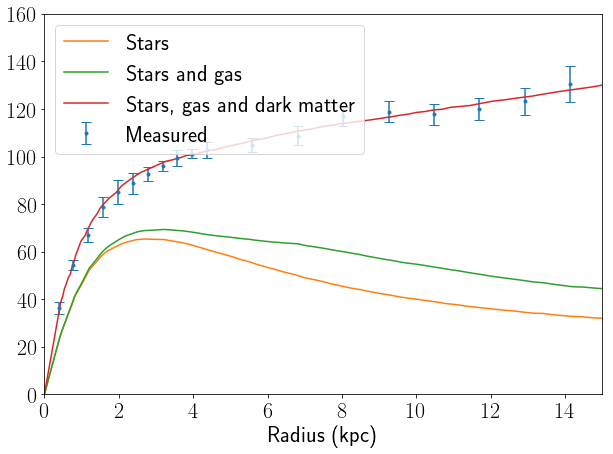

In [7]:
plt.errorbar(d['pts_x'], d['pts'], d['dpts'], marker='.', capsize=5, ls='None', label='Measured')
plt.plot(d['stellar_disk_x'], d['stellar_disk'], label='Stars')
plt.plot(d['x'], d['baryons'], label='Stars and gas')
plt.plot(d['fit_x'], d['fit'], label='Stars, gas and dark matter')

# plt.plot(d['x'], d['all'], label='All')
# plt.plot(d['gas_x'], d['gas'], label='Gas')
plt.xlabel('Radius (kpc)')
plt.ylim(0, 160)
plt.xlim(0, 15)
plt.legend()

### Fancy rotation curve

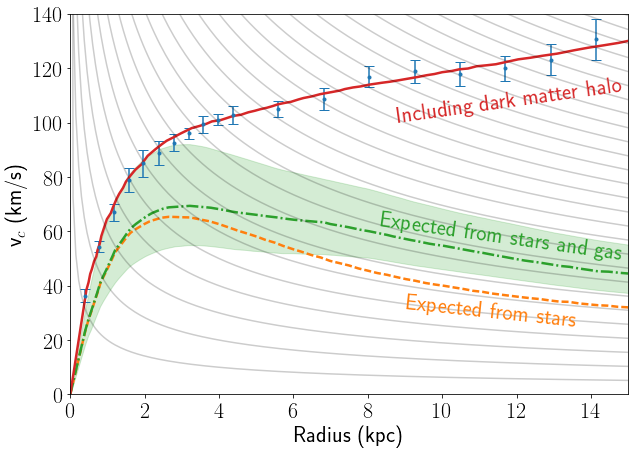

In [8]:
plt.errorbar(d['pts_x'], d['pts'], d['dpts'], marker='.', capsize=5, ls='None', label='Measured')
plt.plot(d['stellar_disk_x'], d['stellar_disk'], label='Stars', ls='--', lw=2.5)
plt.plot(d['x'], d['baryons'], label='Stars and gas', ls='-.', lw=2.5)
plt.plot(d['fit_x'], d['fit'], label='Stars, gas and dark matter', lw=2.5)

plt.xlabel(r'Radius (kpc)')
plt.ylabel(r'v$_c$ (km/s)')
plt.ylim(0, 140)
plt.xlim(0, 15)
plt.text(9, 32, 'Expected from stars', color='C1', rotation = -6)
plt.text(8.3, 62.5, 'Expected from stars and gas', color='C2', rotation = -8)
plt.text(8.75, 112, 'Including dark matter halo', color='C3', rotation = 8)

plt.fill_between(d['x'], d['lum-'], d['lum+'], color='C2', alpha=0.2)

xp = np.linspace(0.001, 15, 200)
for start in np.arange(20, 701, 20):
    plt.plot(xp, start * np.sqrt(1/xp), color='k', alpha=0.2, lw=1.5)

plt.savefig('plots/rotationcurve.pdf', bbox_inches='tight')